In [81]:
import rasterio
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path

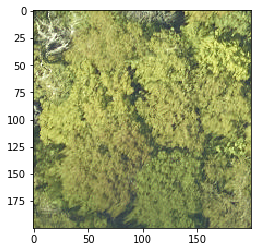

In [97]:
# View tif images
with rasterio.open('data/train/RemoteSensing/RGB/MLBS_1.tif') as dataset:
    img_array = dataset.read()
    img_array = np.moveaxis(img_array, 0, -1)
    img_array = img_array.astype(np.uint8)
    plt.imshow(img_array)
#     img = Image.fromarray(img_array, 'RGB')
#     img.save('data/train/RemoteSensing/RGB/MLBS_1.png')

In [109]:
def convert_directory(dirpath, mode='RGB'):
    '''
    Given a directory 'dirpath', as a pathlib Path, convert all .tif (GeoTiff)
    files into .png files, and place them in a separate directory with the 
    same name but "_png" concatenated at the end.
    
    mode - type of image to be passed to Image.fromarray. 'L' for grayscale or
    'RGB' for RGB.
    
    We convert the GeoTiff files to .png files since we shouldn't care about 
    the geographic coordinates of the image, only the raster data itself.
    '''
    for filename in os.listdir(dirpath):
        if not filename.endswith('.tif'):
            continue

        with rasterio.open(dirpath / filename, 'r') as geotiff: 
            img_array = geotiff.read()
            img_array = np.moveaxis(img_array, 0, -1)
            img_array = np.squeeze(img_array)
            img_array = img_array.astype(np.uint8)
            img = Image.fromarray(img_array, mode)

            newdir = dirpath.parent / (dirpath.name + '_png')

            img.save(newdir / f'{filename.split(".")[0]}.png')

### Convert RGB and Canopy data from geotiff to png
Note that canopy data pixel values are near 0 so they all look black, so prob not that useful for viewing unless normalized

In [114]:
base = Path('data') / 'train' / 'RemoteSensing'
dirs = ['RGB', 'CHM']
for d in dirs:
    if d == 'CHM':
        mode = 'L'
    else:
        mode = 'RGB'
        
    newdir = base / (d + '_png')
    if not os.path.isdir(newdir):
        os.mkdir(newdir)
    convert_directory(base / d, mode=mode)

In [125]:
with rasterio.open('data/train/RemoteSensing/RGB/MLBS_1.tif') as dataset:
    print(dataset.bounds.left)
    print(dataset.xy(0, 0))

542055.0
(542055.05, 4134998.95)
